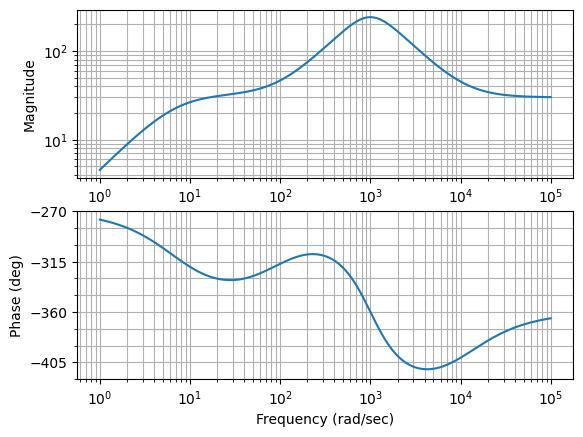

In [1]:
%matplotlib inline
import control
import numpy as np
import matplotlib.pyplot as plt

s = control.tf('s')

controller = (30 * s / (7 + s) + 0.3 * s * 1/(1 + 2e-6**0.5 * s + 1e-6 * s**2))
mag, phase, omega = control.bode(controller)

Text(0.5, 1.0, 'Open loop bode plot')

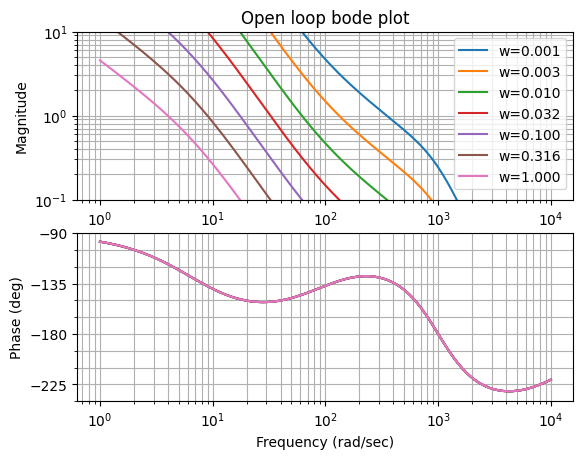

In [11]:
weights = np.logspace(-3, 0, 7)

open_loop = [controller * (1 / (w * s**2)) for w in weights]

pts = control.bode(open_loop, np.logspace(0, 4, 200))
ax1,ax2 = plt.gcf().axes     # get subplot axes
ax1.set_ylim([0.1, 10])
ax1.legend([f'w={w:.3f}' for w in weights])
ax1.set_title('Open loop bode plot')

Text(0.5, 1.0, 'Closed loop bode plot')

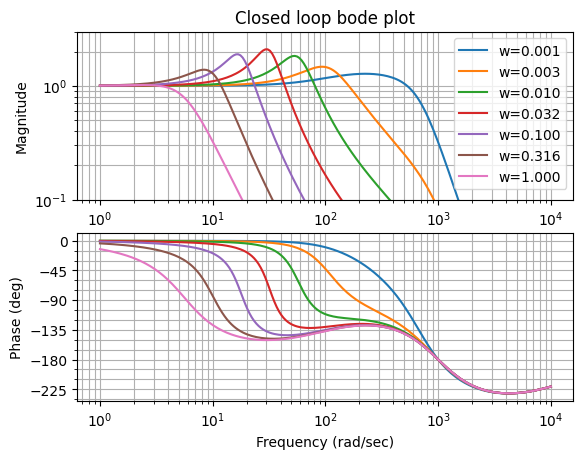

In [12]:
closed_loop = [control.feedback(f) for f in open_loop]

pts = control.bode(closed_loop, np.logspace(0, 4, 200))

ax1,ax2 = plt.gcf().axes     # get subplot axes
ax1.set_ylim([0.1, 3])
ax1.legend([f'w={w:.3f}' for w in weights])
ax1.set_title('Closed loop bode plot')

# Velocity controller design

Designing a system that can tolerate backlash can be difficult.
It measn the system must be stable over a wide range of inertias, since the inertia when the gears are engaged can be orders of magnitude lower than when the gears are disengaged.
This means that the control loop must operate at a much higher frequency than the base system dynamics.

By using a high-passed position controller we can achieve over 30 degrees of phase margin over a wide range of inertias.
$$ G_{\rm controller} (s) = \frac{K_{\rm low} \cdot s}{1 + s/\omega_{\rm HPF}} + K_{\rm high} \cdot s \cdot F_{\rm LPF} (s) $$
This controller works well because the resonant frequency of the dish is quite low and there's a fair amount of stiction, what's needed is a very stiff velocity controller at low frequency, which enables stable performance with very low rotation rates.

# Position control

Now that we have a well-tuned velocity loop that is stable across a wide range of driven inertias, we can run a proportional controller from position error to velocity setpoint.
We can also "feedforward" a target velocity into this controller.

So long as velocity doesn't change too quickly, the position tracking can be extremely accurate.

One drawback of this approach is that we have slew rate limits on velocity.  With slew rate limit $\alpha$ and velocity error $\omega$ we require a convergence distance of $\theta = \omega^2 / (2\alpha)$.

Therefore if position error is $\theta$ we should ensure $\omega_{\rm error} \leq \sqrt{|2 \theta \alpha|}$ to prevent overshoot.